## Mengunduh Dataset dari Google Drive

In [1]:
# Mengimpor modul drive dari google.colab untuk mengakses Google Drive
from google.colab import drive

# Memasang (mount) Google Drive ke direktori /content/drive sehingga file-file di Google Drive dapat diakses
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Menginstal gdown untuk mengunduh file dari Google Drive
!pip install gdown

In [3]:
#Mengunduh File dataset
import gdown

file_id = '1T5aRSP8017U4dOZiHgxhK2yeEmF-npfL'
output = '/content/dataset.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1T5aRSP8017U4dOZiHgxhK2yeEmF-npfL
From (redirected): https://drive.google.com/uc?id=1T5aRSP8017U4dOZiHgxhK2yeEmF-npfL&confirm=t&uuid=b3d36d47-0f21-4c76-b359-489b31b39baa
To: /content/dataset.zip
100%|██████████| 144M/144M [00:05<00:00, 25.4MB/s]


'/content/dataset.zip'

## Mengekstrak Dataset


In [4]:
import zipfile
import os

# Path ke file zip dan direktori tujuan ekstraksi
zip_file_path = 'dataset.zip'
extract_dir = 'Dataset'

# Membuat direktori tujuan jika belum ada
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Mengekstrak file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Ekstraksi selesai.")


Ekstraksi selesai.


In [5]:
from natsort import natsorted

# Path direktori dataset yang telah diekstrak
dataset_dir = 'Dataset/American Sign Language Digits Dataset'

# List semua subdirektori (angka 0-9)
subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Loop untuk setiap subdirektori
for subdir in subdirs:
    subdir_path = os.path.join(dataset_dir, subdir)
    file_paths = []

    # List semua file dalam subdirektori
    for root, dirs, files in os.walk(subdir_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_paths.append(os.path.join(root, file))

    # Urutkan file secara alami
    file_paths = natsorted(file_paths)

    # Menentukan nomor awal untuk penamaan baru
    start_number = 1

    # Loop untuk merename setiap file dalam subdirektori
    for index, file_path in enumerate(file_paths, start=start_number):
        # Dapatkan direktori dan ekstensi file
        dir_name = os.path.dirname(file_path)
        ext = os.path.splitext(file_path)[1]

        # Buat nama file baru dengan format "Sign <number>.ext"
        new_file_name = f"Sign_{index}{ext}"
        new_file_path = os.path.join(dir_name, new_file_name)

        # Rename file
        os.rename(file_path, new_file_path)
        print(f"Renamed '{file_path}' to '{new_file_path}'")

print("Renaming complete.")


Streaming output truncated to the last 5000 lines.
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (402).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_602.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (403).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_603.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (404).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_604.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (405).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_605.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (406).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_606.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (407).jpeg' to 'Dataset/American Sign Language Digits Dataset/6/Sign_607.jpeg'
Renamed 'Dataset/American Sign Language Digits Dataset/6/Sign 6 (408).jpeg' to 'Dataset/Ame

## Mengimport Library yang Diperlukan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from datetime import datetime
from google.colab import files
import io


import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

## Membaca Dataset

In [7]:
#Path Direktori Dataset
root_dir = 'Dataset/American Sign Language Digits Dataset'
image_data = []

for label in range(10):
    label_dir = os.path.join(root_dir, str(label))
    for image_file in os.listdir(label_dir):
        image = Image.open(os.path.join(label_dir, image_file))
        image_data.append({
            'label': label,
            'color_image': image
        })

df = pd.DataFrame(image_data)

In [8]:
df

,label,color_image
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
6995,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6996,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6997,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6998,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...


## Visualisasi Distribusi Label dan Contoh Gambar dari Dataset

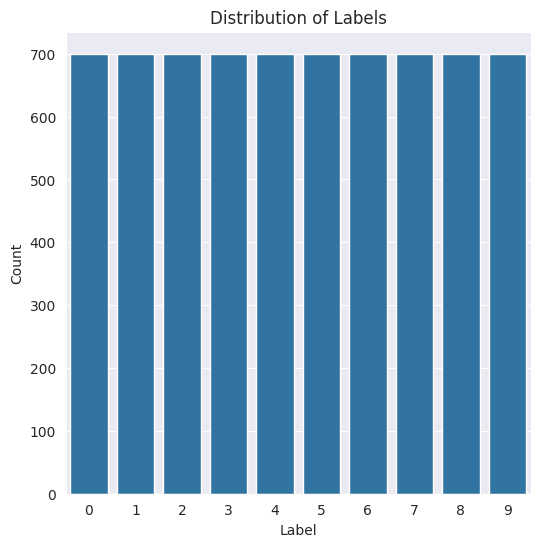

In [9]:
# Plot distribusi label dalam dataset
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

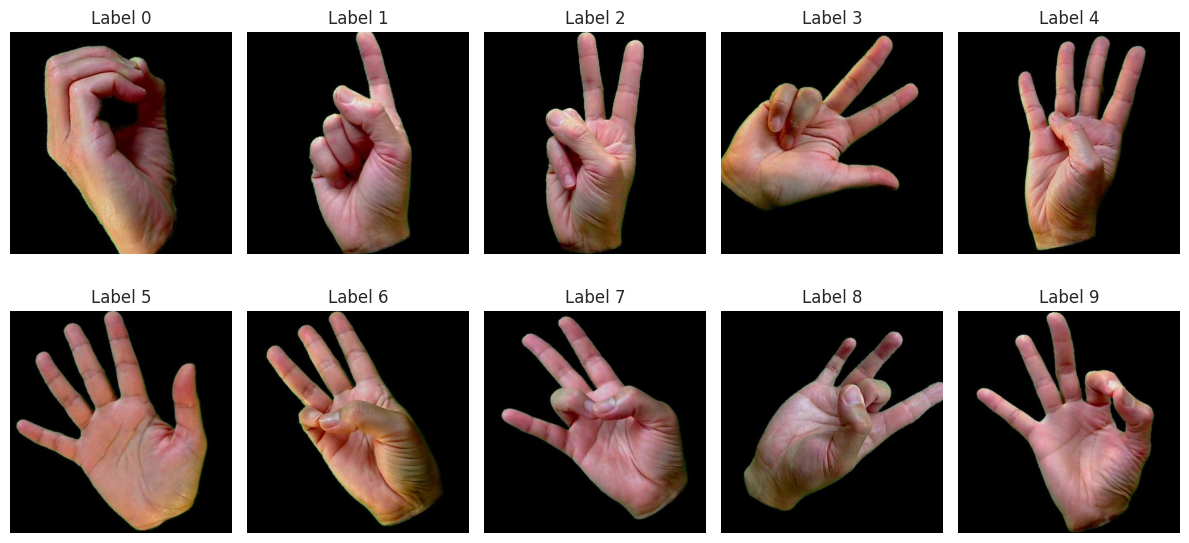

In [10]:
# Menampilkan contoh gambar untuk setiap label
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

## Membagi Dataset untuk Pelatihan Model

In [11]:
# Mengonversi kolom 'color_image' dari gambar PIL ke array numpy
images = df['color_image'].tolist()
labels = np.array(df['label'])

# Mengubah ukuran gambar ke dimensi yang diinginkan
resized_images = []
for image in images:
    # Memastikan gambar adalah objek PIL Image
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    resized_image = image.resize((32, 32))
    resized_images.append(np.array(resized_image))

# Mengonversi daftar gambar yang telah diubah ukurannya ke array numpy
images = np.array(resized_images)

# Menormalkan nilai piksel
images = images / 255.0

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Mengonversi label ke format kategori
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Memverifikasi bentuk array
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5600, 32, 32, 3)
X_test shape: (1400, 32, 32, 3)
y_train shape: (5600, 10)
y_test shape: (1400, 10)


## Membangun Model

In [12]:
# Membangun model
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

# Mengkompilasi model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Merangkum model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 50)        2

In [13]:
# Augmentasi data
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

## Melatih model

In [14]:
# Callback untuk mengurangi learning rate
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

# Melatih model
history = model.fit(
    datagen.flow(X_train, y_train),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
175/175 [==============================] - 35s 190ms/step - loss: 1.8884 - accuracy: 0.3475 - val_loss: 2.3872 - val_accuracy: 0.1557 - lr: 0.0100
Epoch 2/30
175/175 [==============================] - 32s 183ms/step - loss: 1.0739 - accuracy: 0.6248 - val_loss: 1.7200 - val_accuracy: 0.4064 - lr: 0.0100
Epoch 3/30
175/175 [==============================] - 32s 185ms/step - loss: 0.7615 - accuracy: 0.7448 - val_loss: 0.6876 - val_accuracy: 0.8014 - lr: 0.0100
Epoch 4/30
175/175 [==============================] - 35s 200ms/step - loss: 0.5789 - accuracy: 0.8059 - val_loss: 0.5654 - val_accuracy: 0.7964 - lr: 0.0100
Epoch 5/30
175/175 [==============================] - 32s 183ms/step - loss: 0.4771 - accuracy: 0.8338 - val_loss: 0.2399 - val_accuracy: 0.9429 - lr: 0.0100
Epoch 6/30
175/175 [==============================] - 32s 185ms/step - loss: 0.4005 - accuracy: 0.8664 - val_loss: 0.2349 - val_accuracy: 0.9250 - lr: 0.0100
Epoch 7/30
175/175 [==============================] 

## Visualisasi Metrik Pelatihan dan Confusion Matrix

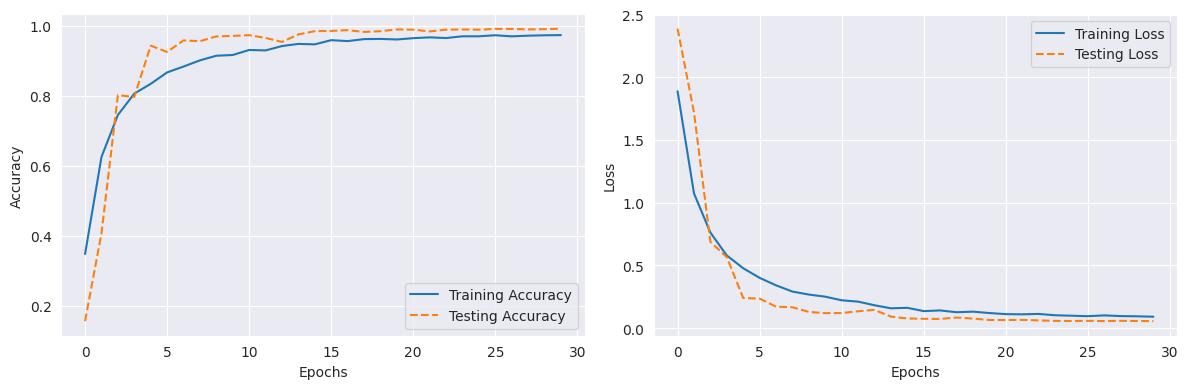

In [15]:
# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mendefinisikan label plot dan gaya
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot akurasi dan loss pelatihan dan pengujian
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [16]:
# Mendapatkan prediksi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

44/44 [==============================] - 2s 33ms/step


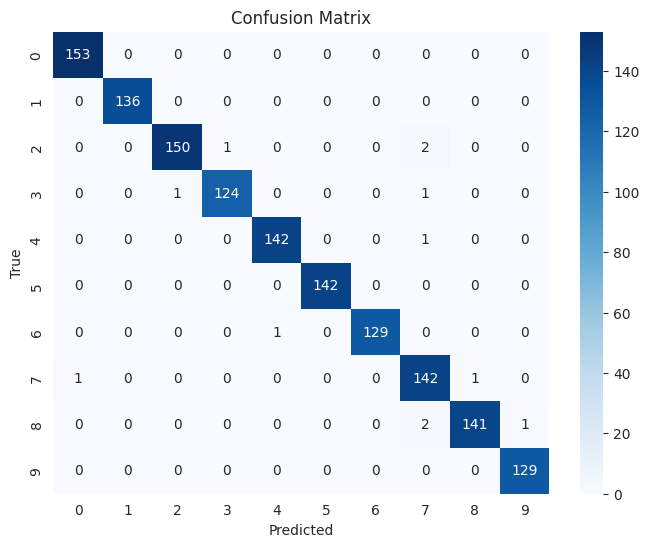

In [17]:
# Membuat confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Evaluasi Model

In [18]:
# Mengevaluasi model pada set pengujian
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

44/44 [==============================] - 2s 35ms/step - loss: 0.0556 - accuracy: 0.9914
validation test results - Loss: 0.05557228997349739 - Accuracy: 99.1428554058075%


## Menyimpan Model

In [19]:
# Definisi path untuk menyimpan model
MODEL_BASE_PATH = "Modeldigit"
PROJECT_NAME = "Capstone"
SAVE_MODEL_NAME = "angka_" + datetime.now().strftime("%d_%m_%Y") + ".h5"  # Format nama file sesuai tanggal
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

# Buat direktori proyek jika belum ada
if not os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)):
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

# Simpan model
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path, include_optimizer=False)

print(f"Model berhasil disimpan dengan nama '{SAVE_MODEL_NAME}' di direktori '{os.path.join(MODEL_BASE_PATH, PROJECT_NAME)}'")


Saving Model At Modeldigit/Capstone/angka_14_06_2024.h5...
Model berhasil disimpan dengan nama 'angka_14_06_2024.h5' di direktori 'Modeldigit/Capstone'


## Uji Prediksi Model

In [25]:
# Memuat model yang telah disimpan
SAVE_MODEL_NAME = "/content/Modeldigit/Capstone/angka_14_06_2024.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

loaded_model = load_model(save_model_path)
loaded_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Fungsi untuk menyiapkan gambar
def prepare_image(image):
    image = image.convert("RGB") if image.mode != "RGB" else image
    image = image.resize((32, 32))
    image = np.array(image) / 255.0
    return np.expand_dims(image, axis=0)

# Fungsi untuk melakukan prediksi pada gambar
def predict_image(image, model):
    processed_image = prepare_image(image)
    prediction = model.predict(processed_image)
    pred_class = np.argmax(prediction, axis=1)[0]
    predicted_confidence = np.max(prediction)
    return pred_class, predicted_confidence

# Mengunggah dan memprediksi gambar
uploaded = files.upload()

for filename in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[filename]))
    pred_class, confidence = predict_image(image, loaded_model)
    print(f'Predicted class: {pred_class}, Confidence: {confidence:.2f}')

Saving 7.jpg to 7.jpg
1/1 [==============================] - 0s 186ms/step
Predicted class: 7, Confidence: 0.95


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 23ms/step


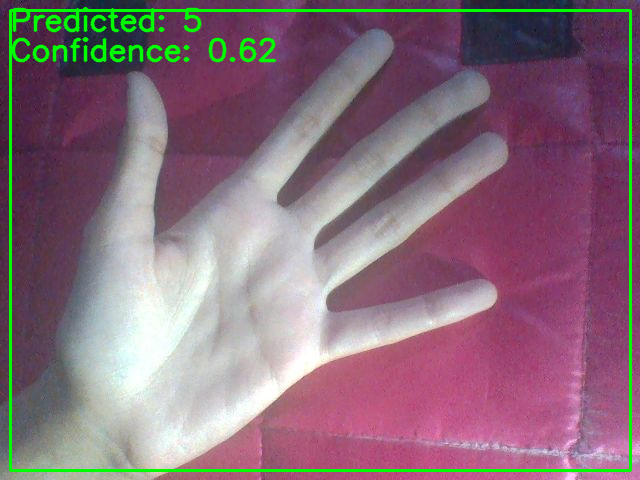

In [79]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def prepare_image(image):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize((32, 32))
    image = np.array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Ambil gambar menggunakan webcam
image_file = take_photo()
image = cv2.imread(image_file)

# Ubah ukuran gambar agar sesuai dengan model
image_resized = cv2.resize(image, (32, 32))
image_pil = Image.fromarray(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
processed_image = prepare_image(image_pil)

# Prediksi dengan model
prediction = loaded_model.predict(processed_image)
pred_class = np.argmax(prediction, axis=1)[0]
predicted_confidence = np.max(prediction)

# Tambahkan bingkai hijau dan teks prediksi pada gambar
color = (0, 255, 0)  # Warna hijau dalam BGR
thickness = 2
cv2.rectangle(image, (10, 10), (image.shape[1] - 10, image.shape[0] - 10), color, thickness)
cv2.putText(image, f"Predicted: {pred_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
cv2.putText(image, f"Confidence: {predicted_confidence:.2f}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

# Tampilkan gambar
cv2_imshow(image)